In [1]:
from pathlib import Path
import matplotlib.pyplot as plt          # type: ignore
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from matplotlib import cm
import numpy as np                       # type: ignore
import pandas as pd                      # type: ignore
import seaborn as sns                    # type: ignore
from sklearn.datasets import fetch_california_housing  # type: ignore

In [2]:
sns.set(style="whitegrid", context="notebook")

In [3]:
ds = fetch_california_housing(as_frame=True)
df = ds.frame.rename(columns=str.lower)

/var/folders/mt/p4xbqy111nd1_1s2y1lk_cbh0000gp/T/ipykernel_17681/672560628.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


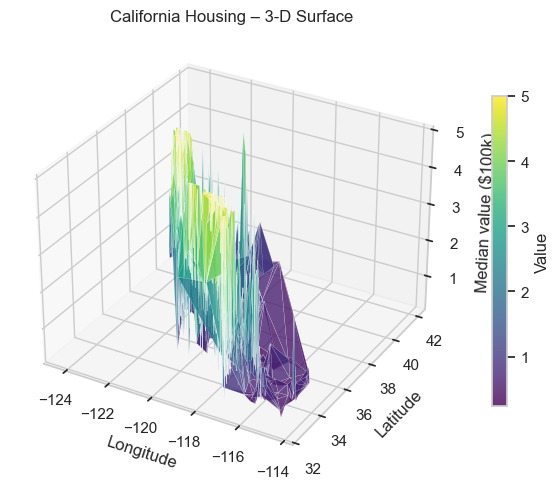

In [4]:
lon = df["longitude"]
lat = df["latitude"]
z = df["medhouseval"]

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_trisurf(
    lon,
    lat,
    z,
    cmap="viridis",
    linewidth=0.1,
    antialiased=True,
    alpha=0.8,
)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Median value ($100k)")
ax.set_title("California Housing – 3-D Surface")
fig.colorbar(surf, ax=ax, shrink=0.7, label="Value")
plt.tight_layout()
fig.show()

/var/folders/mt/p4xbqy111nd1_1s2y1lk_cbh0000gp/T/ipykernel_17681/679399667.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


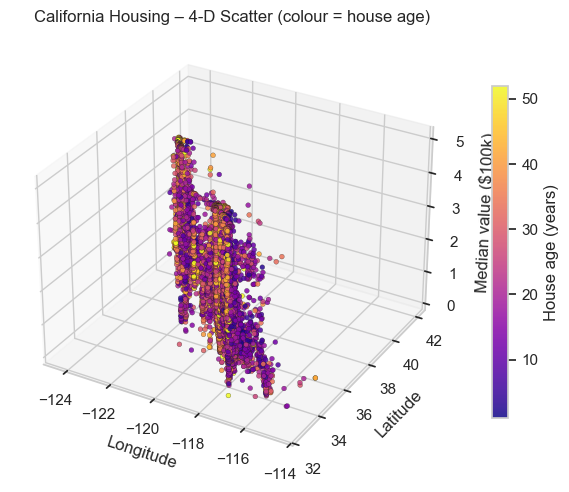

In [5]:
sample = df.sample(10_000, random_state=42)
x, y, z = sample["longitude"], sample["latitude"], sample["medhouseval"]
c = sample["houseage"]

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection="3d")
sc = ax.scatter(
    x,
    y,
    z,
    c=c,
    cmap="plasma",
    s=12,
    alpha=0.85,
    linewidth=0.2,
    edgecolor="k",
)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Median value ($100k)")
ax.set_title("California Housing – 4-D Scatter (colour = house age)")
fig.colorbar(sc, ax=ax, shrink=0.75, label="House age (years)")
plt.tight_layout()
fig.show()

/var/folders/mt/p4xbqy111nd1_1s2y1lk_cbh0000gp/T/ipykernel_17681/2501045398.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(
/var/folders/mt/p4xbqy111nd1_1s2y1lk_cbh0000gp/T/ipykernel_17681/2501045398.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


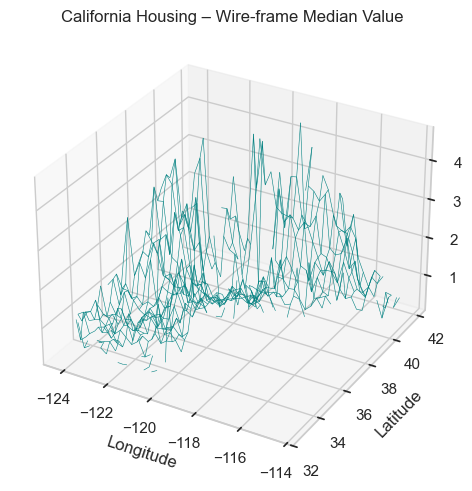

In [6]:
lon_bins = np.linspace(df["longitude"].min(), df["longitude"].max(), 40)
lat_bins = np.linspace(df["latitude"].min(), df["latitude"].max(), 40)

pivot = (
    df.pivot_table(
        values="medhouseval",
        index=pd.cut(df["latitude"], lat_bins),
        columns=pd.cut(df["longitude"], lon_bins),
        aggfunc="mean",
    )
    .sort_index(ascending=False)
)

X_centers = (lon_bins[:-1] + lon_bins[1:]) / 2
Y_centers = (lat_bins[:-1] + lat_bins[1:]) / 2
X, Y = np.meshgrid(X_centers, Y_centers)
Z = pivot.values

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, color="teal", linewidth=0.4)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Median value ($100k)")
ax.set_title("California Housing – Wire-frame Median Value")
plt.tight_layout()
fig.show()

/var/folders/mt/p4xbqy111nd1_1s2y1lk_cbh0000gp/T/ipykernel_17681/1888621801.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


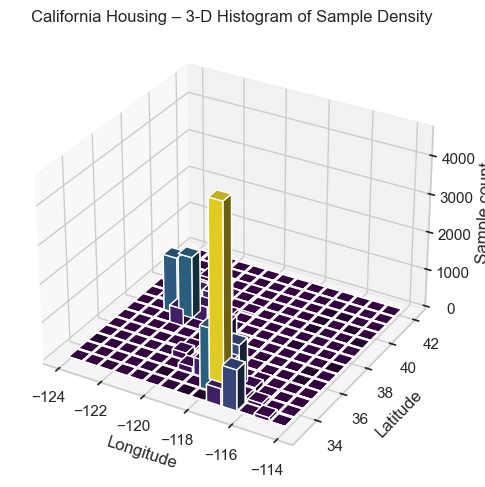

In [7]:
lon_bins = np.linspace(df["longitude"].min(), df["longitude"].max(), 15)
lat_bins = np.linspace(df["latitude"].min(), df["latitude"].max(), 15)
counts, lon_edges, lat_edges = np.histogram2d(
    df["longitude"], df["latitude"], bins=[lon_bins, lat_bins]
)

# centres & sizes
lon_centers = (lon_edges[:-1] + lon_edges[1:]) / 2
lat_centers = (lat_edges[:-1] + lat_edges[1:]) / 2
Xc, Yc = np.meshgrid(lon_centers, lat_centers)
xpos = Xc.ravel()
ypos = Yc.ravel()
zpos = np.zeros_like(xpos)

dx = (lon_edges[1] - lon_edges[0]) * 0.9
dy = (lat_edges[1] - lat_edges[0]) * 0.9
dz = counts.T.ravel()

norm = dz / dz.max()
colors = cm.viridis(norm)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection="3d")
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors, shade=True)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Sample count")
ax.set_title("California Housing – 3-D Histogram of Sample Density")
plt.tight_layout()
fig.show()

In [8]:
df = sns.load_dataset("mpg").dropna()

/var/folders/mt/p4xbqy111nd1_1s2y1lk_cbh0000gp/T/ipykernel_17681/3295279244.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


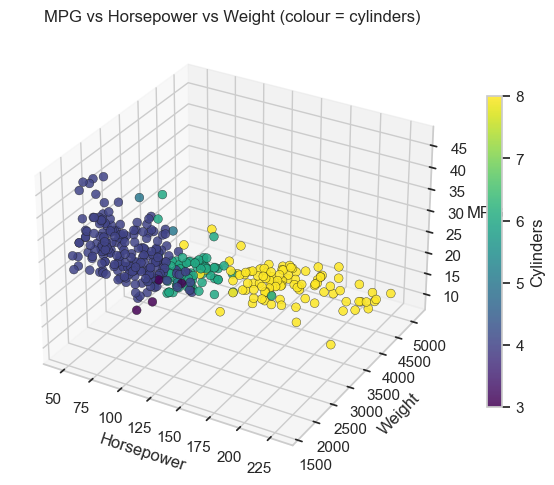

In [9]:

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection="3d")
sc = ax.scatter(
    df["horsepower"],
    df["weight"],
    df["mpg"],
    c=df["cylinders"],
    cmap="viridis",
    s=40,
    alpha=0.85,
    edgecolor="k",
    linewidth=0.3,
)
ax.set_xlabel("Horsepower")
ax.set_ylabel("Weight")
ax.set_zlabel("MPG")
ax.set_title("MPG vs Horsepower vs Weight (colour = cylinders)")
fig.colorbar(sc, ax=ax, label="Cylinders", shrink=0.7)
plt.tight_layout()
fig.show()

/var/folders/mt/p4xbqy111nd1_1s2y1lk_cbh0000gp/T/ipykernel_17681/2148260140.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


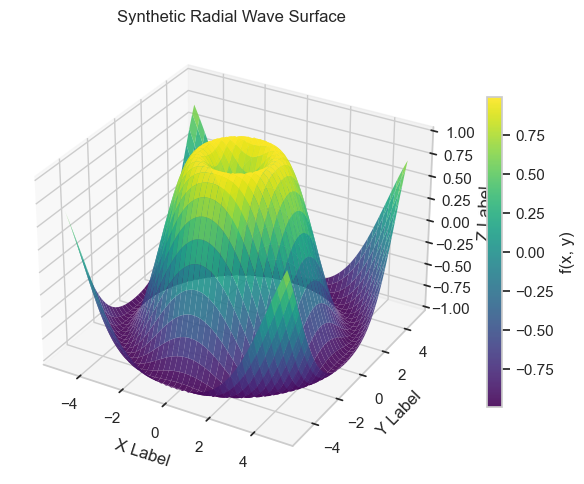

In [10]:
x = np.linspace(-5, 5, 120)
y = np.linspace(-5, 5, 120)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(
    X,
    Y,
    Z,
    cmap="viridis",
    linewidth=0,
    antialiased=True,
    alpha=0.9,
)
ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")
ax.set_title("Synthetic Radial Wave Surface")
fig.colorbar(surf, ax=ax, shrink=0.7, label="f(x, y)")
plt.tight_layout()
fig.show()

/var/folders/mt/p4xbqy111nd1_1s2y1lk_cbh0000gp/T/ipykernel_17681/2687201601.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


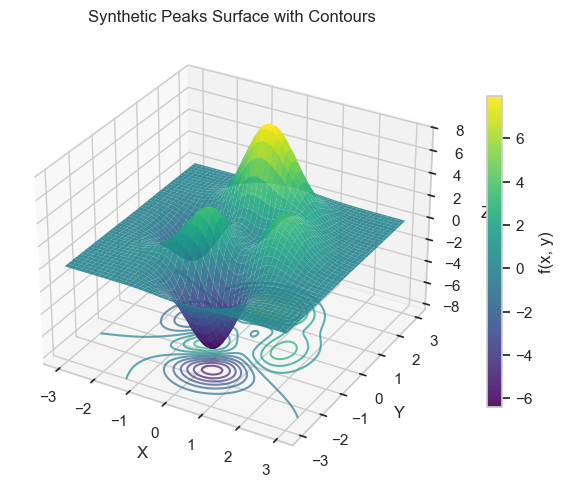

In [11]:
x = np.linspace(-3, 3, 90)
y = np.linspace(-3, 3, 90)
X, Y = np.meshgrid(x, y)
Z = 3 * (1 - X) ** 2 * np.exp(-(X ** 2) - (Y + 1) ** 2) - 10 * (
    X / 5 - X ** 3 - Y ** 5
) * np.exp(-X ** 2 - Y ** 2) - 1 / 3 * np.exp(-(X + 1) ** 2 - Y ** 2)

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection="3d")

surf = ax.plot_surface(
    X,
    Y,
    Z,
    cmap="viridis",
    linewidth=0,
    antialiased=True,
    alpha=0.9,
)

z_min = Z.min() - 2  # offset below the min surface height
ax.contour(
    X,
    Y,
    Z,
    zdir="z",
    offset=z_min,
    cmap="viridis",
    levels=15,
    alpha=0.7,
)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Synthetic Peaks Surface with Contours")
ax.set_zlim(z_min, Z.max())
fig.colorbar(surf, ax=ax, shrink=0.7, label="f(x, y)")
plt.tight_layout()
fig.show()